# Principal Component Analysis

### Introdução
Em ciência de dados e aprendizado de máquina, frequentemente trabalhamos com conjuntos de dados que contêm muitas variáveis (também chamadas de **features** ou **dimensões**). Embora essas variáveis possam conter informações úteis, um número muito grande de dimensões pode tornar o processamento de dados e a visualização difíceis, além de prejudicar o desempenho dos algoritmos de Machine Learning.

Esse fenômeno é chamado de **maldição da dimensionalidade** e ocorre quando o número de dimensões aumenta tanto que os dados se tornam esparsos no espaço, dificultando a análise e a generalização do modelo. A redução de dimensionalidade é uma técnica que resolve esse problema, condensando as informações mais importantes em um número menor de dimensões.

**Casos em que precisamos reduzir a dimensionalidade**:
- Quando há muitas variáveis e a visualização ou o entendimento do comportamento dos dados se torna difícil.
- Quando há colinearidade entre variáveis, ou seja, algumas variáveis são altamente correlacionadas e não adicionam novas informações.
- Quando queremos aumentar a eficiência computacional, uma vez que menos dimensões geralmente significam menos tempo de treinamento.
- Para evitar o overfitting, ou seja, quando um modelo se ajusta demais aos dados de treinamento, afetando sua capacidade de generalização.

Uma técnica amplamente utilizada para redução de dimensionalidade é a **Principal Component Analysis (Análise de Componentes Principais)**. Neste notebook, utilizaremos o PCA para reduzir um conjunto de dados de quatro variáveis para duas, facilitando sua visualização e interpretação.

### Objectivo do Notebook
O objetivo deste notebook é utilizar a técnica de **Principal Component Analysis (PCA)** para reduzir a dimensionalidade de um conjunto de dados, condensando suas características em duas dimensões principais. Isso facilitará a visualização, interpretação dos dados e ajudará a melhorar a eficiência computacional dos modelos, sem perder informações significativas.



### Importação das Bibliotecas Necessárias
Nesta célula, são importadas todas as bibliotecas necessárias para realizar a análise. Utilizamos **Pandas** e **Numpy** para manipulação de dados, **Matplotlib** e **Seaborn** para criar gráficos, e **Scikit-Learn** para o pré-processamento dos dados e aplicação do algoritmo de clusterização.

Se ainda não tiver instalado as bibliotecas abaixo, remova o `#` e execute a célula abaixo para instalar antes de continuar.

In [13]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [15]:
# Importação das Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Carregar o Conjunto de Dados
Aqui estamos utilizando o conjunto de dados **Iris**, amplamente utilizado em exemplos de Machine Learning. Ele contém quatro variáveis que medem o comprimento e a largura das sépalas e pétalas de três espécies de flores: **Iris-setosa**, **Iris-versicolor** e **Iris-virginica**.

As variáveis originais são renomeadas para português para facilitar o entendimento.


In [17]:
# Carregar o Conjunto de Dados Iris
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [19]:
# Renomear as colunas para português
df.columns = ['Comprimento da Sépala (cm)', 'Largura da Sépala (cm)', 
              'Comprimento da Pétala (cm)', 'Largura da Pétala (cm)']

# Exibir as primeiras linhas do conjunto de dados renomeado
print(df.head())

   Comprimento da Sépala (cm)  Largura da Sépala (cm)  \
0                         5.1                     3.5   
1                         4.9                     3.0   
2                         4.7                     3.2   
3                         4.6                     3.1   
4                         5.0                     3.6   

   Comprimento da Pétala (cm)  Largura da Pétala (cm)  
0                         1.4                     0.2  
1                         1.4                     0.2  
2                         1.3                     0.2  
3                         1.5                     0.2  
4                         1.4                     0.2  


### Análise Exploratória de Dados (EDA)
A visualização acima mostra um **pairplot** que nos ajuda a entender a relação entre as variáveis e como elas diferem entre as três espécies de flores. Podemos observar que algumas variáveis parecem ter uma boa separação entre as espécies, enquanto outras se sobrepõem mais.

No entanto, a visualização de dados com mais de três dimensões não é prática. Por isso, usaremos a PCA para reduzir essas dimensões.


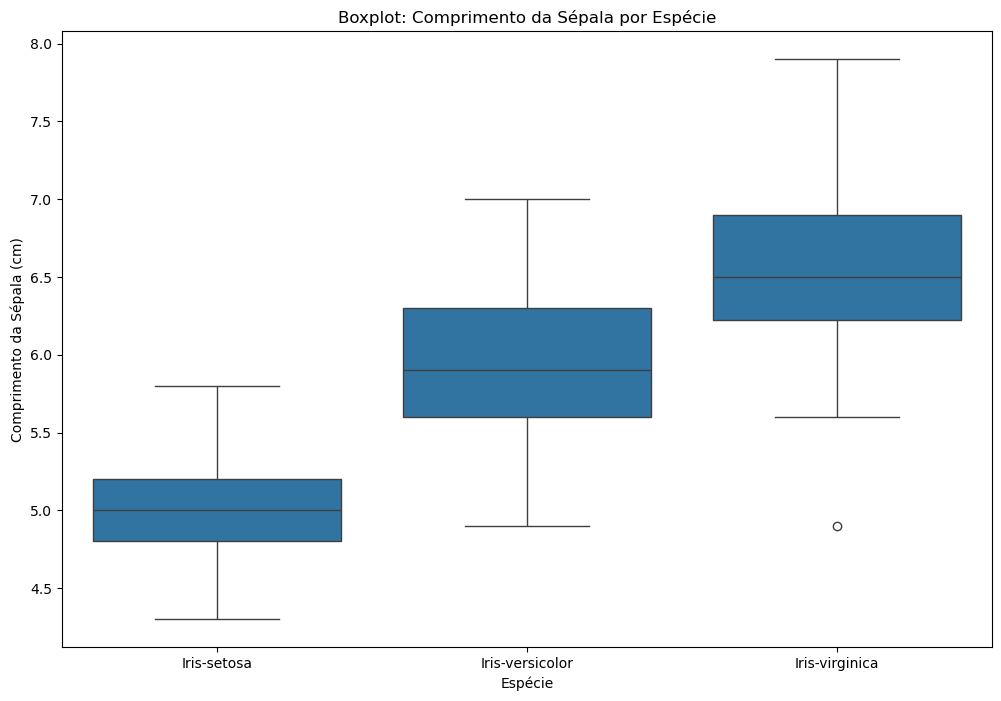

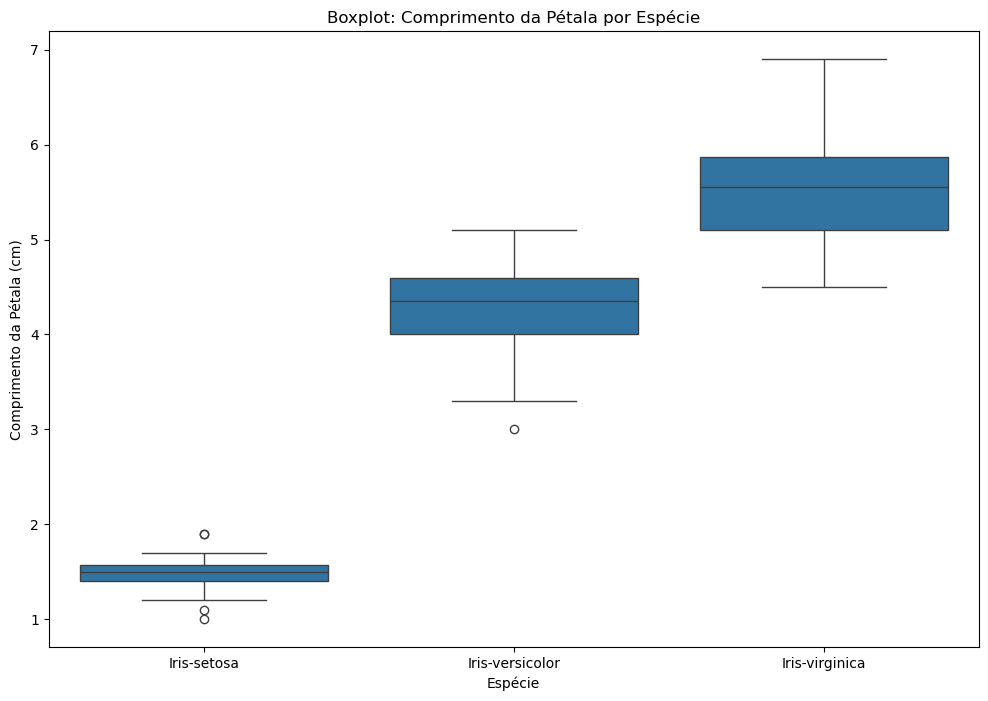

In [39]:
# Boxplot para visualizar a distribuição das variáveis por espécie
df_species = pd.concat([df, pd.Series(iris.target, name='Espécie')], axis=1)
df_species['Espécie'] = df_species['Espécie'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Plotando os boxplots para cada variável
plt.figure(figsize=(12, 8))
sns.boxplot(x='Espécie', y='Comprimento da Sépala (cm)', data=df_species)
plt.title('Boxplot: Comprimento da Sépala por Espécie')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Espécie', y='Comprimento da Pétala (cm)', data=df_species)
plt.title('Boxplot: Comprimento da Pétala por Espécie')
plt.show()

### Normalização dos Dados
Antes de aplicarmos o PCA, é importante normalizar os dados. Isso ocorre porque a PCA é sensível à escala das variáveis. Variáveis com unidades maiores terão mais peso na análise, o que pode distorcer os resultados.

Aqui, usamos o **StandardScaler** do Scikit-learn para normalizar as variáveis, garantindo que cada uma tenha média zero e desvio padrão igual a um.


In [21]:
# Normalização das Variáveis
sc = StandardScaler()
X = sc.fit_transform(df)

### Aplicação da Análise de Componentes Principais (PCA)
Agora aplicamos a **PCA** para reduzir as quatro dimensões originais para duas. A PCA encontra as direções no espaço de maior variância (chamadas de componentes principais) e projeta os dados nessas novas direções.

Reduzir para duas dimensões facilita a visualização e ainda preserva a maior parte da variância presente nos dados.


In [27]:
# Aplicação da PCA (Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [29]:
# Aplicação da PCA (Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### DataFrame com os Componentes Principais
Após a aplicação da PCA, criamos um novo DataFrame que contém as duas novas variáveis (Componentes Principais 1 e 2) e a coluna de **Espécie**, para que possamos manter a informação sobre a qual classe a flor pertence.


In [31]:
# Criação de DataFrame para os Componentes Principais
df_componentes = pd.DataFrame(data = X_pca, columns = ['Componente Principal 1', 'Componente Principal 2'])

# Adicionar a coluna de espécie ao DataFrame
df_componentes['Espécie'] = iris.target

# Mapeamento das classes de alvo para os nomes das espécies
df_componentes['Espécie'] = df_componentes['Espécie'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Exibir as primeiras linhas do novo DataFrame com os Componentes Principais e Espécie
print(df_componentes.head())

   Componente Principal 1  Componente Principal 2      Espécie
0               -2.264703                0.480027  Iris-setosa
1               -2.080961               -0.674134  Iris-setosa
2               -2.364229               -0.341908  Iris-setosa
3               -2.299384               -0.597395  Iris-setosa
4               -2.389842                0.646835  Iris-setosa


### Visualização dos Resultados
Nesta visualização, as duas **componentes principais** são representadas graficamente, e as flores são coloridas de acordo com sua espécie. 

Podemos observar que a **Iris-setosa** se separa bem das outras duas espécies, enquanto **Iris-versicolor** e **Iris-virginica** têm alguma sobreposição, sugerindo que suas características são mais semelhantes.

Mesmo com a redução para duas dimensões, a PCA preserva uma quantidade significativa de informação, permitindo que padrões nos dados ainda sejam identificados.

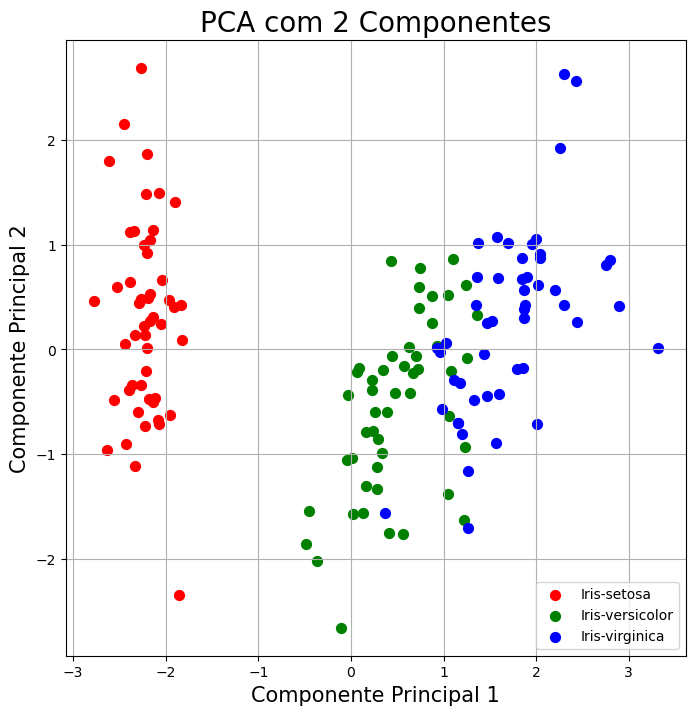

In [33]:
# Visualização dos Resultados da PCA
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('PCA com 2 Componentes', fontsize = 20)

# Definir os alvos (Espécies)
alvos = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cores = ['r', 'g', 'b']

# Plotar os pontos com base na espécie
for alvo, cor in zip(alvos, cores):
    indices_para_manter = df_componentes['Espécie'] == alvo
    ax.scatter(df_componentes.loc[indices_para_manter, 'Componente Principal 1'],
               df_componentes.loc[indices_para_manter, 'Componente Principal 2'],
               c = cor, s = 50)

ax.legend(alvos)
ax.grid()
plt.show()

### Conclusão
Neste notebook, realizamos a **redução de dimensionalidade** no conjunto de dados Iris usando a **Análise de Componentes Principais (PCA)**. Iniciamos com um conjunto de dados de quatro variáveis (Comprimento da Sépala, Largura da Sépala, Comprimento da Pétala, Largura da Pétala) e reduzimos esse número para duas variáveis, os **Componentes Principais**.

Essa transformação permite uma visualização mais simples e nos ajuda a identificar padrões nos dados. Embora tenhamos reduzido as dimensões, ainda conseguimos preservar a maior parte da variância original, garantindo que as informações mais importantes fossem mantidas.

A PCA é uma ferramenta poderosa para reduzir a complexidade dos dados e melhorar a eficiência dos algoritmos de aprendizado de máquina.

### Nota
Todos os dados utilizados neste notebook são puramente para **fins de demonstração**.

### Este notebook foi escrito por Simão Rafique

Pode seguir-me no [LinkedIn](https://www.linkedin.com/in/simão-rafique).